# **Preliminar Clustering Analysis with PCA**

In [70]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

## Cyclist Dataset

In [71]:
cyclists_df = pd.read_csv('../dataset/cyclists_outlier.csv')

In [72]:
len(cyclists_df)

3476

Creating three support features to PCA in order to try to understand if there's some schema inside that that follows cyclists career level concerning clustering

In [73]:
# Sort the cyclists_df DataFrame by the 'career_level' column in descending order
sorted_cyclists_df = cyclists_df.sort_values(by='career_level', ascending=False)

# Define the bins and labels for 3 bins
bins_3 = [0, 1160, 2320, len(sorted_cyclists_df)]
labels_3 = ['Top', 'Middle', 'Bottom']

# Define the bins and labels for 4 bins
bins_4 = [0, 870, 1740, 2610, len(sorted_cyclists_df)]
labels_4 = ['Top', 'Upper Middle', 'Lower Middle', 'Bottom']

# Define the bins and labels for 5 bins
bins_5 = [0, 696, 1392, 2088, 2784, len(sorted_cyclists_df)]
labels_5 = ['Top', 'Upper Middle', 'Middle', 'Lower Middle', 'Bottom']

# Create new columns based on the bins
sorted_cyclists_df['top_cyclists_3_bins'] = pd.cut(range(1, len(sorted_cyclists_df) + 1), bins=bins_3, labels=labels_3, right=False)
sorted_cyclists_df['top_cyclists_4_bins'] = pd.cut(range(1, len(sorted_cyclists_df) + 1), bins=bins_4, labels=labels_4, right=False)
sorted_cyclists_df['top_cyclists_5_bins'] = pd.cut(range(1, len(sorted_cyclists_df) + 1), bins=bins_5, labels=labels_5, right=False)

# Add the new columns to the original cyclists_df
cyclists_df = cyclists_df.merge(sorted_cyclists_df[['_url', 'top_cyclists_3_bins', 'top_cyclists_4_bins', 'top_cyclists_5_bins']], on='_url', how='left')

In [74]:
cyclists_df.columns

Index(['_url', 'name', 'birth_year', 'nationality', 'cyclist_experience',
       'cyclist_experience_points', 'cyclist_win', 'cyclist_win_ratio',
       'avg_relative_position', 'relative_position_std',
       'mean_last_20_positions', 'mean_last_20_positions_1',
       'min_relative_position', 'avg_position_vs_startlist',
       'performance_entropy', 'weighted_podiums', 'career_level',
       'avg_position', 'best_position', 'best_position_std', 'mean_sq',
       'top_experience', 'continent', 'top_cyclists', 'top_cyclists_3_bins',
       'top_cyclists_4_bins', 'top_cyclists_5_bins'],
      dtype='object')

In [75]:
# Sort the cyclists_df DataFrame by the 'avg_relative_position' column in ascending order
sorted_cyclists_df = cyclists_df.sort_values(by='avg_relative_position', ascending=True)

# Define the bins and labels for 3 bins
bins_3 = [0, 1160, 2320, len(sorted_cyclists_df)]
labels_3 = ['Top', 'Middle', 'Bottom']

# Define the bins and labels for 4 bins
bins_4 = [0, 870, 1740, 2610, len(sorted_cyclists_df)]
labels_4 = ['Top', 'Upper Middle', 'Lower Middle', 'Bottom']

# Define the bins and labels for 5 bins
bins_5 = [0, 696, 1392, 2088, 2784, len(sorted_cyclists_df)]
labels_5 = ['Top', 'Upper Middle', 'Middle', 'Lower Middle', 'Bottom']

# Create new columns based on the bins
sorted_cyclists_df['avg_rel_3_bins'] = pd.cut(range(1, len(sorted_cyclists_df) + 1), bins=bins_3, labels=labels_3, right=False)
sorted_cyclists_df['avg_rel_4_bins'] = pd.cut(range(1, len(sorted_cyclists_df) + 1), bins=bins_4, labels=labels_4, right=False)
sorted_cyclists_df['avg_rel_5_bins'] = pd.cut(range(1, len(sorted_cyclists_df) + 1), bins=bins_5, labels=labels_5, right=False)

# Add the new columns to the original cyclists_df
cyclists_df = cyclists_df.merge(sorted_cyclists_df[['_url', 'avg_rel_3_bins', 'avg_rel_4_bins', 'avg_rel_5_bins']], on='_url', how='left')

In [76]:
# Sort the cyclists_df DataFrame by the 'mean_sq' column in ascending order
sorted_cyclists_df_mean_sq = cyclists_df.sort_values(by='mean_sq', ascending=True)

# Define the bins and labels for 3 bins
bins_mean_sq_3 = [0, 1160, 2320, len(sorted_cyclists_df_mean_sq)]
labels_mean_sq_3 = ['Top', 'Middle', 'Bottom']

# Define the bins and labels for 4 bins
bins_mean_sq_4 = [0, 870, 1740, 2610, len(sorted_cyclists_df_mean_sq)]
labels_mean_sq_4 = ['Top', 'Upper Middle', 'Lower Middle', 'Bottom']

# Define the bins and labels for 5 bins
bins_mean_sq_5 = [0, 696, 1392, 2088, 2784, len(sorted_cyclists_df_mean_sq)]
labels_mean_sq_5 = ['Top', 'Upper Middle', 'Middle', 'Lower Middle', 'Bottom']

# Create new columns based on the bins
sorted_cyclists_df_mean_sq['mean_sq_3_bins'] = pd.cut(range(1, len(sorted_cyclists_df_mean_sq) + 1), bins=bins_mean_sq_3, labels=labels_mean_sq_3, right=False)
sorted_cyclists_df_mean_sq['mean_sq_4_bins'] = pd.cut(range(1, len(sorted_cyclists_df_mean_sq) + 1), bins=bins_mean_sq_4, labels=labels_mean_sq_4, right=False)
sorted_cyclists_df_mean_sq['mean_sq_5_bins'] = pd.cut(range(1, len(sorted_cyclists_df_mean_sq) + 1), bins=bins_mean_sq_5, labels=labels_mean_sq_5, right=False)

# Add the new columns to the original cyclists_df
cyclists_df = cyclists_df.merge(sorted_cyclists_df_mean_sq[['_url', 'mean_sq_3_bins', 'mean_sq_4_bins', 'mean_sq_5_bins']], on='_url', how='left')

First of all, we create a numerical dataset excluding the categorical ones from the original cleaned and engineered dataset.

In [77]:
columns_to_keep = ["avg_relative_position", "mean_sq", "career_level"]
numeric_dataset = cyclists_df[columns_to_keep].select_dtypes(include=['float64', 'int64'])

numeric_dataset.head()

,avg_relative_position,mean_sq,career_level
0,4.725525,1615.878378,14371.866873
1,10.415002,775.122449,1514.222579
2,7.259367,1052.086957,8115.442081
3,9.004356,784.895833,1673.263534
4,8.623247,972.963542,11460.308567


In [78]:
scaler = StandardScaler()
scaler.fit(numeric_dataset)
X = scaler.transform(numeric_dataset)

### PCA

We do the PCA analysis to visualize in 2D the distribution of our multi-dimensional data and we colour points according to career level of the cyclists, trying to find a schema into data that split data according to career level. We do this first with categorical feature with 3 bins, then with 4 bins and finally with 5 bins.

/var/folders/hy/hstnjjns1znck26g7mhszl380000gn/T/ipykernel_14185/954939367.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend = plt.legend(title="top_cyclists_3_bins", loc="center left")


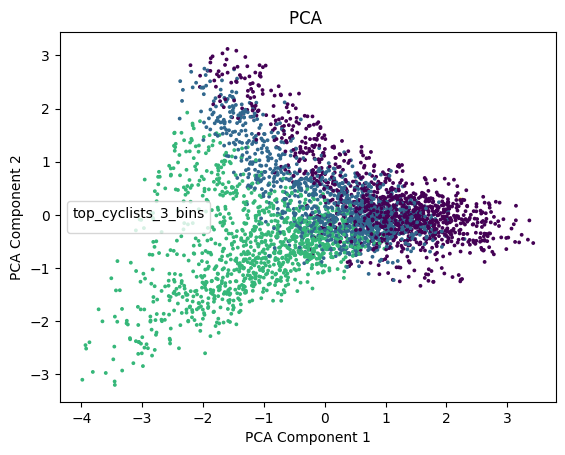

In [79]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(cyclists_df['top_cyclists_3_bins'])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, s=3)
legend = plt.legend(title="top_cyclists_3_bins", loc="center left")

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA ')
plt.show()

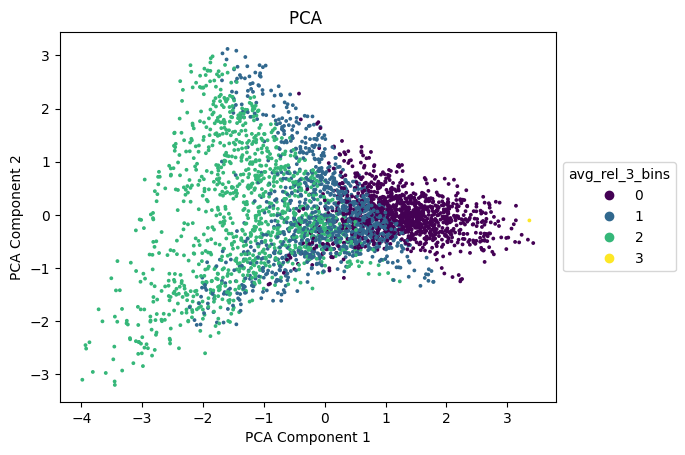

In [80]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(cyclists_df['avg_rel_3_bins'])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, s=3)
legend = plt.legend(*scatter.legend_elements(), title="avg_rel_3_bins", loc="center left", bbox_to_anchor=(1, 0.5))

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA ')
plt.show()

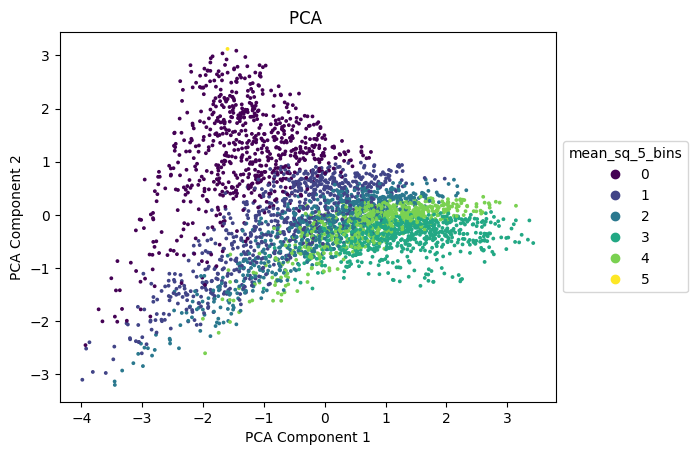

In [81]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(cyclists_df['mean_sq_5_bins'])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, s=3)
legend = plt.legend(*scatter.legend_elements(), title="mean_sq_5_bins", loc="center left", bbox_to_anchor=(1, 0.5))

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA ')
plt.show()

From this plot we ca

---

---

## Races Dataset

In [82]:
races_df = pd.read_csv('../dataset/races_outlier.csv')

First of all, we create a numerical dataset excluding the categorical ones from the original cleaned and engineered dataset.

In [83]:
races_complexity_cluster_col = ["climb_total", "avg_cyclists_level", "duration_to_length"]

numeric_dataset = races_df[races_complexity_cluster_col].select_dtypes(include=['float64', 'int64'])

numeric_dataset.head()

,climb_total,avg_cyclists_level,duration_to_length
0,3.300,-0.036133,25.5090
1,3.500,0.133930,26.1683
2,3.495,0.101016,25.5867
3,3.558,0.263208,25.3112
4,3.320,0.206134,25.3351


In [84]:
scaler = StandardScaler()
scaler.fit(numeric_dataset)
X = scaler.transform(numeric_dataset)

### PCA

We do the PCA analysis to visualize in 2D the distribution of our multi-dimensional data.

TODO: add catrgories labels in the plots

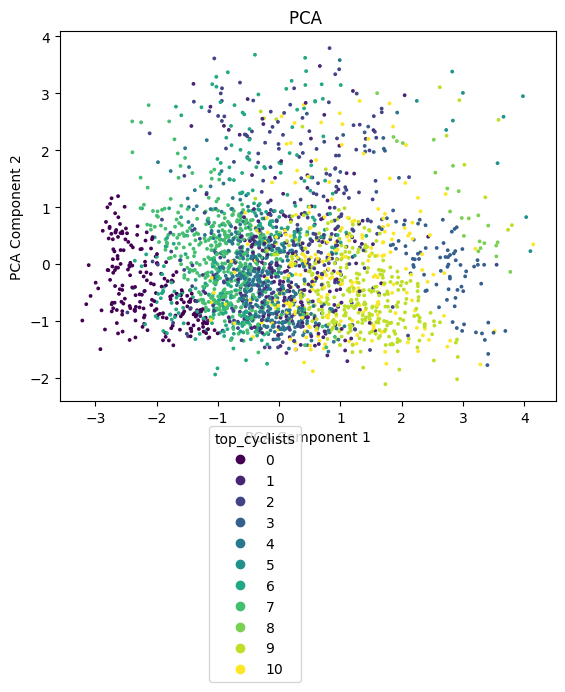

In [85]:
label_encoder = LabelEncoder()
continent_labels = label_encoder.fit_transform(races_df['top_complex_races_2'])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=continent_labels, s=3)
legend = plt.legend(*scatter.legend_elements(), title="top_cyclists",  bbox_to_anchor=(0.5, -0.05))

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA ')
plt.show()